# knapsack problem using Ant Colony algorithm

# الگوریتم کلی
۱- پارامترهای الگوریتم شامل اندازه جمعیت، اندازه مجموعه، تعداد زیر مجموعه ها، آرایه هزینه های زیر مجموعه ها، زیر مجموعه ها، پارامتر آلفا و بتا و نرخ تبخیر را مقدار دهی اولیه میکنیم.
۲- با انتخاب تصادفی زیرمجموعه های مجموعه داده شده، یک جمعیت اولیه از مورچه ها ایجاد میکنیم.
۳- فیتنس هر مورچه در جمعیت را با استفاده از تابع تناسب محاسبه میکنیم.
۴- دنباله فرمون را بر اساس فیتنس راه حل مورچه به روز میکنیم.
۵- آرایه فرمون را بر اساس نرخ تبخیر تبخیر میکنیم.
۶- مراحل 2-5 را تکرار میکنیم تا زمانی که یک معیار توقف (مثلاً حداکثر تعداد تکرار یا معیار همگرایی) برآورده شود.
۷- بهترین راه حل پیدا شده توسط مورچه ها را به عنوان راه حل نهایی انتخاب میکنیم.

In [35]:
import random
import numpy as np
import time
from math import sqrt, ceil


### کلاس AntColony:

کلاس AntColony کلاس اصلی است که الگوریتم Ant Colony را پیاده سازی می کند. این کلاس چندین تایع دارد که برای مقداردهی اولیه الگوریتم، تولید جمعیت اولیه، محاسبه فیتنس هر مورچه و به روز رسانی دنباله فرمون استفاده می شود.

#### تابع init:

روش init ثابت ها و آرایه های مورد استفاده در الگوریتم را مقداردهی اولیه می کند. pop_size، set_size، subsets_size، subsets_costs_array، subsets، alpha، beta و evap_val ثابت های مورد استفاده در الگوریتم هستند. جمعیت، آرایه_فرومونی و fitness_arr آرایه هایی هستند که در روش algorithm.initial استفاده می شوند:

تابع initialنیز برای تولید جمعیت اولیه و محاسبه فیتنس مورچه های اولیه استفاده می شود. جمعیت با انتخاب تصادفی زیرمجموعه های مجموعه داده شده ایجاد می شود. تناسب اندام هر مورچه با استفاده از روش fitness_function محاسبه می شود.

#### تابع fitness_function:

تابع fitness_function فیتنس یک مورچه را با جمع کردن ارزش کالای های موجود در راه‌حل مورچه محاسبه می‌کند. 

#### تابع های evaporation_pheromone و evaporation_pheromone_array:

روش تبخیر_فرومون برای تبخیر فرمون در زیر مجموعه بر اساس میزان تبخیر استفاده می شود. روش تبخیر_فرومون_آرایه برای تبخیر فرمون در تمامی زیر مجموعه ها بر اساس نرخ تبخیر استفاده می شود.

#### تابع calc_pheromone_array:
در این تابع فورومون های موجود بر روی هر زیرمجموعه، براساس تابعی از برازش راه حل ارائه شده شده توسط مورچه جایگذاری میشود. که این مقدار از فرمولی محاسبه میشود که بدین صورت است که فورمون قبلی و برازش راه حل ارائه شده. در واقع اگر راه حلی دارای هزینه کمتر باشد، برازش بیشتری دارد و درنتیجه فورمون  بیشتری دریافت میکند. همچنین تابع گفته شده را میتوان به عنوان پارامتر این تابع ورودی داد تا نحوه تاثیر برازش راه حل متفاوت شود. هر چه این تاثیر بیشتر شود، میزان انتفاع نیز بیشتر میشود.


#### تابع select_next_obg:
تابع select_next_obg برای انتخاب کالا های بعدی برای اضافه کردن به راه حل مورچه استفاده می شود. این تابع از توزیع احتمال وزن دار برای انتخاب کالا بعدی استفاده می کند. وزن هر کالا بر اساس دنباله فرمون و اطلاعات اکتشافی محاسبه می شود. دنباله فرمون به توان آلفا و اطلاعات اکتشافی به توان بتا می‌رسد. اطلاعات اکتشافی به عنوان تعداد عناصر جدیدی که با اضافه کردن کالا تقسیم بر هزینه کالا پوشش داده می شود، محاسبه می شود.همچنین تقسیم این قسمت باعث بهتر شدن سرعت الگوریتم شد و به همین دلیل حذف شد

#### تابع ant_tour:
روش ant_tour برای تولید یک راه حل برای مورچه استفاده می شود. این روش از روش select_next_obg برای انتخاب زیرمجموعه بعدی برای اضافه کردن به راه حل استفاده می کند تا زمانی که تمام عناصر مجموعه داده شده پوشش داده شوند.

#### تابع next_itation:
تابع next_iteration برای تولید یک جمعیت جدید با ایجاد یک راه حل برای هر مورچه در جمعیت فعلی استفاده می شود. فیتنس هر مورچه محاسبه می شود و دنباله فرمون به روز می شود. در نهایت، دنباله فرمون بر اساس نرخ تبخیر تبخیر می شود.



In [36]:
class AntColony:
    def __init__(self, pop_size: int, weights_array: list,knapsack_size:float ,values, alpha: float = 1, beta: float = 1, evap_val: float = 0.15):
        # First we set our constants:
        self.pop_size = pop_size            # Number of our ants
        self.alpha = alpha
        self.beta = beta                    # Metahuristic parameters
        self.evap_val = evap_val            # Evaporation parameter
        self.weights_array = weights_array   
        self.weights_array_size = len(weights_array)
        self.knapsack_size=knapsack_size
        self.max_fitness = 1
        self.best_ans = 0
        self.best_ans_array = 0
        self.values = values
                   
        # Then we set our variable Arrays:
        self.population = None
        self.pheromone_array = [ 0.01 for idx in range(self.weights_array_size)]
        self.fitness_arr     = [0 for i in range(self.pop_size)]

    def initial(self):

        print("len : " , self.weights_array_size)

        # Set the inital population
        self.population = [list(random.sample(range(self.weights_array_size), random.randint(1,self.weights_array_size-1))) for i in range(self.pop_size)]
        # self.population = [self.ant_tour() for i in range(self.pop_size)]

        

    def fitness_function(self, ant:list[int]):
        fitness_value = 0
        for idx_of_obj in ant:
            fitness_value += self.values[idx_of_obj]
        if (self.max_fitness < fitness_value):
            self.max_fitness = fitness_value
            self.best_ans = fitness_value
            self.best_ans_array = ant

            print ("fitness : " , fitness_value , ant , [self.weights_array[i] for i in ant])
        return fitness_value
    
    def evaporation_pheromone(self, pheromone, p):  # p should be less than 1
        return (1-p)*pheromone

    def evaporation_pheromone_array(self):
        for i in range(self.weights_array_size - 1):
            random_p = self.evap_val
            curr_pheromone = self.evaporation_pheromone(self.pheromone_array[i], random_p)
            self.pheromone_array[i] = curr_pheromone

    def calc_pheromone_array(self, ant, func=lambda a: a):
        delta_fitness = func(self.fitness_function(ant))
        for idx_of_obj in ant:
            self.pheromone_array[idx_of_obj] +=(delta_fitness/self.max_fitness)/10
    
    def select_next_obj(self,  neighbors):
        indexes = []
        weights = []
        for obj_idx in range(self.weights_array_size):
            if neighbors[obj_idx] == 1 :
                indexes.append(obj_idx)
                weights.append((self.pheromone_array[obj_idx] ** self.alpha))
                # ( ( self.weights_array[obj_idx]) ** self.beta) 
        next_obj = random.choices(indexes, weights=weights)[0]
        return next_obj

    def ant_tour(self):
        visited_objs = [ 1 for i in range(self.weights_array_size)]
        tour = []
        weight = 0
        
        while (sum(visited_objs) ):
            next_obj_idx = self.select_next_obj(visited_objs)
            weight+=self.weights_array[next_obj_idx]
            if (weight<=self.knapsack_size):
                tour.append(next_obj_idx)
            else:
                weight-=self.weights_array[next_obj_idx]
            visited_objs[next_obj_idx] = 0
            # print ("sum: ", sum(visited_objs) , next_obj_idx ," --- " ,self.weights_array[next_obj_idx])
        return tour

    def next_iteration(self):
        for ant_idx in range(self.pop_size):
            curr_ant = self.ant_tour()
            self.population[ant_idx] = curr_ant
            self.fitness_arr[ant_idx] = self.fitness_function(curr_ant)
            self.calc_pheromone_array(curr_ant)
        self.evaporation_pheromone_array()


In [37]:
def max_knapsack(ant_colony: AntColony, stop_point, stop_gen=500):
    MIN_INT = 0

    set_covering = ant_colony
    set_covering.initial()
    set_covering.next_iteration()
    ith_gen_arr = []
    max_cost_iteration = []
    best_ans = MIN_INT
    best_ans_array = 0
    ith_gen = 1
    for i in range(1,1001):

        if ith_gen >= stop_gen or stop_point == set_covering.best_ans:
            break
        set_covering.next_iteration()
        ith_gen_arr.append(i)
        max_cost_iteration.append(set_covering.best_ans )

    print("the best answer is : ",set_covering.best_ans , set_covering.best_ans_array)

    import matplotlib.pyplot as plt
    plt.plot(ith_gen_arr, max_cost_iteration)
    plt.xlabel("ith generation")
    plt.ylabel("max value")

    plt.show()
    


In [38]:
n_item = 50
weights = [80, 82, 85, 70, 72, 70, 
66, 50, 55, 25, 50, 55, 40, 48, 50, 32, 22, 60, 30, 32, 40, 38, 35, 
32, 25, 28, 30, 22, 50, 30, 45, 30, 60, 50, 20, 65, 20, 25, 30, 10, 
20, 25, 15, 10, 10, 10, 4, 4, 2, 1]
values = [220, 208, 198, 192, 180, 180, 165, 162, 160, 158, 155, 
130, 125, 122, 120, 118, 115, 110, 105, 101, 100, 100, 98, 96, 
95, 90, 88, 82, 80, 77, 75, 73, 72, 70, 69, 66, 65, 63, 60, 58, 56, 
50, 30, 20, 15, 10, 8, 5, 3, 1]
capacity = 1000

len :  50
fitness :  2616 [41, 22, 39, 27, 37, 28, 6, 0, 17, 8, 4, 19, 44, 15, 36, 9, 34, 31, 25, 42, 10, 35, 11, 5, 29, 45, 47, 46] [25, 35, 10, 22, 25, 50, 66, 80, 60, 55, 72, 32, 10, 32, 20, 25, 20, 30, 28, 15, 50, 65, 55, 70, 30, 10, 4, 4]
fitness :  2642 [11, 41, 34, 36, 22, 45, 19, 31, 39, 4, 49, 5, 10, 17, 6, 42, 27, 35, 37, 8, 24, 28, 46, 9, 48, 29, 43, 0, 47, 44, 16] [55, 25, 20, 20, 35, 10, 32, 30, 10, 72, 1, 70, 50, 60, 66, 15, 22, 65, 25, 55, 25, 50, 4, 25, 2, 30, 10, 80, 4, 10, 22]
fitness :  2651 [5, 34, 0, 44, 43, 6, 11, 49, 37, 25, 17, 46, 22, 15, 39, 28, 47, 41, 45, 9, 35, 42, 8, 31, 48, 36, 27, 29, 19, 24, 10, 23] [70, 20, 80, 10, 10, 66, 55, 1, 25, 28, 60, 4, 35, 32, 10, 50, 4, 25, 10, 25, 65, 15, 55, 30, 2, 20, 22, 30, 32, 25, 50, 32]
fitness :  2704 [28, 35, 0, 5, 42, 8, 27, 47, 31, 48, 43, 46, 37, 34, 39, 41, 15, 23, 17, 19, 11, 25, 36, 9, 4, 49, 45, 22, 10, 24, 16, 44] [50, 65, 80, 70, 15, 55, 22, 4, 30, 2, 10, 4, 25, 20, 10, 25, 32, 32, 60, 32, 55, 28, 20, 25, 7

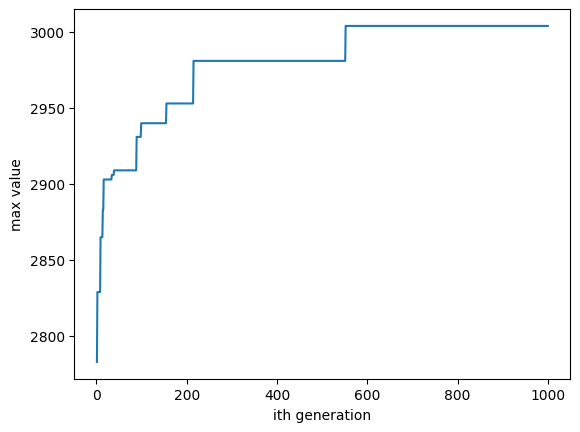

In [39]:
import matplotlib.pyplot as plt
test = AntColony(pop_size=10, weights_array=weights , values = values , knapsack_size=capacity ,alpha=1,beta=1/2,evap_val=0.2)
max_knapsack(test, stop_point=capacity, stop_gen=350)



In [40]:
n_item = 20
weights = [92, 4, 43, 83, 84, 68, 92, 
82, 6, 44, 32, 18, 56, 83, 25, 96, 70, 48, 14, 58]
values = [44, 46, 90, 
72, 91, 40, 75, 35, 8, 54, 78, 40, 77, 15, 61, 17, 75, 29, 75, 63]
capacity = 878

len :  20
fitness :  892 [12, 10, 14, 2, 15, 5, 17, 9, 7, 18, 8, 3, 6, 0, 4, 1] [56, 32, 25, 43, 96, 68, 48, 44, 82, 14, 6, 83, 92, 92, 84, 4]
fitness :  960 [5, 3, 10, 8, 15, 9, 6, 17, 19, 4, 18, 14, 12, 2, 1, 0, 11] [68, 83, 32, 6, 96, 44, 92, 48, 58, 84, 14, 25, 56, 43, 4, 92, 18]
fitness :  977 [5, 11, 1, 19, 13, 14, 3, 12, 16, 15, 8, 10, 18, 6, 9, 2, 4] [68, 18, 4, 58, 83, 25, 83, 56, 70, 96, 6, 32, 14, 92, 44, 43, 84]
fitness :  995 [7, 14, 12, 13, 1, 5, 19, 18, 11, 8, 10, 16, 4, 2, 9, 3, 6] [82, 25, 56, 83, 4, 68, 58, 14, 18, 6, 32, 70, 84, 43, 44, 83, 92]
fitness :  1024 [19, 10, 5, 8, 0, 2, 4, 6, 16, 9, 14, 3, 7, 12, 18, 1, 11] [58, 32, 68, 6, 92, 43, 84, 92, 70, 44, 25, 83, 82, 56, 14, 4, 18]
the best answer is :  1024 [19, 10, 5, 8, 0, 2, 4, 6, 16, 9, 14, 3, 7, 12, 18, 1, 11]


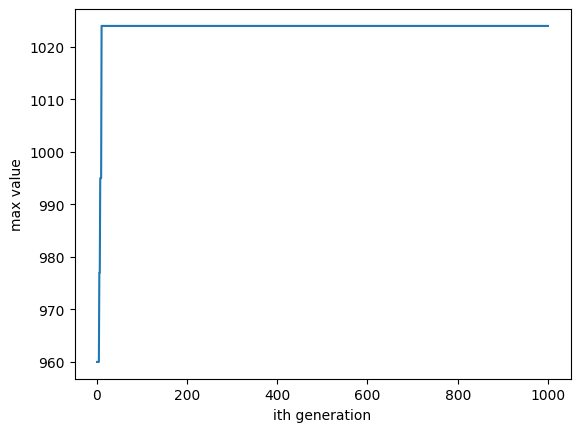

In [41]:
import matplotlib.pyplot as plt
test = AntColony(pop_size=10, weights_array=weights , values = values , knapsack_size=capacity ,alpha=1,beta=1/2,evap_val=0.2)
max_knapsack(test, stop_point=capacity, stop_gen=350)
